<a href="https://colab.research.google.com/github/Harsha-chikkala/Cybersecurity-Threat-Classification-Using-Machine-Learning/blob/main/Cybersecurity_Threat_Classification_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FILE_PATH = '/content/drive/MyDrive/TestbedMonJun14Flows.csv'
df = pd.read_csv(FILE_PATH)

In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (171380, 21)


In [ ]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
          generated            appName  totalSourceBytes  \
0  3/11/2014 18:21        Unknown_UDP             16076   
1  3/11/2014 18:21  HTTPImageTransfer               384   
2  3/11/2014 18:21                DNS               171   
3  3/11/2014 18:21  HTTPImageTransfer               384   
4  3/11/2014 18:21  HTTPImageTransfer               186   

   totalDestinationBytes  totalDestinationPackets  totalSourcePackets  \
0                      0                        0                 178   
1                      0                        0                   6   
2                    642                        4                   2   
3                      0                        0                   6   
4                    128                        2                   2   

  sourcePayloadAsBase64  sourcePayloadAsUTF destinationPayloadAsBase64  \
0                   NaN                 NaN                        NaN   
1                   NaN                 Na

In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   generated                       171380 non-null  object 
 1   appName                         171380 non-null  object 
 2   totalSourceBytes                171380 non-null  int64  
 3   totalDestinationBytes           171380 non-null  int64  
 4   totalDestinationPackets         171380 non-null  int64  
 5   totalSourcePackets              171380 non-null  int64  
 6   sourcePayloadAsBase64           84579 non-null   object 
 7   sourcePayloadAsUTF              0 non-null       float64
 8   destinationPayloadAsBase64      74634 non-null   object 
 9   destinationPayloadAsUTF         74616 non-null   object 
 10  direction                       171380 non-null  object 
 11  sourceTCPFlagsDescription       122074 non-null  object 
 12  d

In [ ]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        totalSourceBytes  totalDestinationBytes  totalDestinationPackets  \
count      1.713800e+05           1.713800e+05            171380.000000   
mean       6.138333e+03           3.610126e+04                33.512802   
std        1.844852e+06           1.318367e+06              1589.229298   
min        0.000000e+00           0.000000e+00                 0.000000   
25%        1.280000e+02           2.940000e+02                 1.000000   
50%        3.970000e+02           9.480000e+02                 5.000000   
75%        7.682500e+02           5.914000e+03                11.000000   
max        7.632776e+08           3.955996e+08            538228.000000   

       totalSourcePackets  sourcePayloadAsUTF     sourcePort  destinationPort  
count       171380.000000                 0.0  171380.000000    171380.000000  
mean            22.638914                 NaN   19553.296306      1827.320376  
std           1331.497830                 NaN   23514.754705 

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 generated                              0
appName                                0
totalSourceBytes                       0
totalDestinationBytes                  0
totalDestinationPackets                0
totalSourcePackets                     0
sourcePayloadAsBase64              86801
sourcePayloadAsUTF                171380
destinationPayloadAsBase64         96746
destinationPayloadAsUTF            96764
direction                              0
sourceTCPFlagsDescription          49306
destinationTCPFlagsDescription     53983
source                                 0
protocolName                           0
sourcePort                             0
destination                            0
destinationPort                        0
startDateTime                          0
stopDateTime                           0
Label                                  0
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 78


In [ ]:
cols_to_drop = df.columns[df.isnull().sum() == df.shape[0]]
df.drop(columns=cols_to_drop, inplace=True)

print("\nDropped Columns (All Null Values):", list(cols_to_drop))
print("\nMissing Values Before Handling:\n", df.isnull().sum())

num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[num_columns] = num_imputer.fit_transform(df[num_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

print("\nMissing Values After Handling:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

print("\nDataset Shape After Removing Duplicates:", df.shape)



Dropped Columns (All Null Values): ['sourcePayloadAsUTF']

Missing Values Before Handling:
 generated                             0
appName                               0
totalSourceBytes                      0
totalDestinationBytes                 0
totalDestinationPackets               0
totalSourcePackets                    0
sourcePayloadAsBase64             86801
destinationPayloadAsBase64        96746
destinationPayloadAsUTF           96764
direction                             0
sourceTCPFlagsDescription         49306
destinationTCPFlagsDescription    53983
source                                0
protocolName                          0
sourcePort                            0
destination                           0
destinationPort                       0
startDateTime                         0
stopDateTime                          0
Label                                 0
dtype: int64

Missing Values After Handling:
 generated                         0
appName                  

In [ ]:
from scipy.stats import zscore

z_scores = df[num_columns].apply(zscore)

threshold = 3
outliers = (z_scores.abs() > threshold).sum()

print("\nOutlier Count per Column:\n", outliers)

df = df[(z_scores.abs() <= threshold).all(axis=1)]

print("\nDataset Shape After Outlier Removal:", df.shape)



Outlier Count per Column:
 totalSourceBytes              4
totalDestinationBytes       166
totalDestinationPackets      91
totalSourcePackets           62
sourcePort                    0
destinationPort            5071
dtype: int64

Dataset Shape After Outlier Removal: (166093, 20)


In [ ]:
from sklearn.preprocessing import StandardScaler
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df.loc[:, num_columns] = scaler.fit_transform(df[num_columns])

print("\nNumerical features normalized using Z-score!")



Numerical features normalized using Z-score!


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

target_column = "Label"

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

if target_column in numeric_columns:
    numeric_columns.remove(target_column)

X = df[numeric_columns]
y = df[target_column]

print("\nTarget Class Distribution Before SMOTE:\n", y.value_counts())

if y.value_counts().min() / y.value_counts().max() < 0.8:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    df_numeric_resampled = pd.DataFrame(X_resampled, columns=numeric_columns)
    df_numeric_resampled[target_column] = y_resampled

    categorical_df = pd.DataFrame(index=range(len(X_resampled)))
    for col in categorical_columns:
        if col != target_column:
            categorical_df[col] = df[col].mode()[0]

    categorical_df[target_column] = y_resampled
    df_resampled = pd.concat([df_numeric_resampled, categorical_df], axis=1)

    print("\nTarget Class Distribution After SMOTE:\n", y_resampled.value_counts())
    print("\nSMOTE applied successfully!")
else:
    df_resampled = df
    print("\nClass distribution is balanced, SMOTE not applied.")

df = df_resampled

print("\nFinal DataFrame Shape:", df.shape)
print("\nFinal Columns:", list(df.columns))



Target Class Distribution Before SMOTE:
 Label
Normal    162490
Attack      3603
Name: count, dtype: int64

Target Class Distribution After SMOTE:
 Label
Normal    162490
Attack    162490
Name: count, dtype: int64

SMOTE applied successfully!

Final DataFrame Shape: (324980, 21)

Final Columns: ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort', 'Label', 'generated', 'appName', 'sourcePayloadAsBase64', 'destinationPayloadAsBase64', 'destinationPayloadAsUTF', 'direction', 'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source', 'protocolName', 'destination', 'startDateTime', 'stopDateTime', 'Label']


In [ ]:
df.shape

(324980, 21)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

def preprocess_and_encode_features(df, verbose=True):
    df = df.copy()

    label_columns = [col for col in df.columns if col.lower() == 'label']
    if len(label_columns) > 1:
        print(f"Warning: Found multiple 'Label' columns: {label_columns}. Keeping the first one.")
        df = df.loc[:, ~df.columns.duplicated()]

    target_column = 'Label' if 'Label' in df.columns else df.columns[-1]
    y = df[target_column].astype(str)
    X = df.drop(columns=[target_column])

    datetime_columns = X.select_dtypes(include=['datetime64']).columns
    for col in datetime_columns:
        X[f'{col}_hour'] = X[col].dt.hour
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_month'] = X[col].dt.month
        X.drop(columns=[col], inplace=True)

    datetime_like_columns = ['startDateTime', 'stopDateTime']
    for col in datetime_like_columns:
        if col in X.columns:
            X[col] = pd.to_datetime(X[col], errors='coerce')
            X[f'{col}_hour'] = X[col].dt.hour
            X[f'{col}_day'] = X[col].dt.day
            X[f'{col}_month'] = X[col].dt.month
            X.drop(columns=[col], inplace=True)

    base64_columns = [col for col in X.columns if 'PayloadAsBase64' in col]
    for col in base64_columns:
        X[f'{col}_length'] = X[col].str.len().fillna(0)
        X[f'{col}_is_present'] = X[col].notna().astype(int)
        X.drop(columns=[col], inplace=True)

    numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = X.select_dtypes(include=['object']).columns

    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    X[numeric_columns] = num_imputer.fit_transform(X[numeric_columns])
    X[categorical_columns] = cat_imputer.fit_transform(X[categorical_columns])

    le = LabelEncoder()
    for col in categorical_columns:
        if X[col].nunique() < 10:
            X[col] = le.fit_transform(X[col].astype(str))
        else:
            one_hot = pd.get_dummies(X[col], prefix=col)
            X = pd.concat([X.drop(columns=[col]), one_hot], axis=1)

    scaler = StandardScaler()
    X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

    y_encoded = le.fit_transform(y)
    final_df = X.copy()
    final_df['Label'] = y_encoded

    if verbose:
        print("\nFinal Preprocessing:")
        print(f"Number of features after preprocessing: {final_df.shape[1] - 1}")
        print(f"Unique target classes: {len(np.unique(y_encoded))}")

    return final_df

encoded_df = preprocess_and_encode_features(df)
print(encoded_df.shape)
print(encoded_df.columns)



Final Preprocessing:
Number of features after preprocessing: 25
Unique target classes: 2
(324980, 26)
Index(['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
       'totalSourcePackets', 'sourcePort', 'destinationPort', 'generated',
       'appName', 'destinationPayloadAsUTF', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'destination', 'startDateTime_hour',
       'startDateTime_day', 'startDateTime_month', 'stopDateTime_hour',
       'stopDateTime_day', 'stopDateTime_month',
       'sourcePayloadAsBase64_length', 'sourcePayloadAsBase64_is_present',
       'destinationPayloadAsBase64_length',
       'destinationPayloadAsBase64_is_present', 'Label'],
      dtype='object')


In [ ]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [ ]:

X = encoded_df.drop('Label', axis=1)
y = encoded_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [ ]:
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import math

def plot_confusion_matrices(models, X_test, y_test):
    num_models = len(models)
    num_cols = 3
    num_rows = math.ceil(num_models / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
    axes = axes.ravel()

    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    for j in range(i + 1, len(axes)):  # Remove unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [ ]:
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    performance_metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    performance_metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    performance_metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


In [ ]:
def plot_model_performance(performance_metrics):
    df_performance = pd.DataFrame(performance_metrics)
    plt.figure(figsize=(15,10))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']


    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)


        sns.barplot(x='Model', y=metric, data=df_performance)
        plt.title(f'{metric} Comparison')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

    plt.show()

    print("\nModel Performance Metrics:")
    print(df_performance.to_string(index=False))

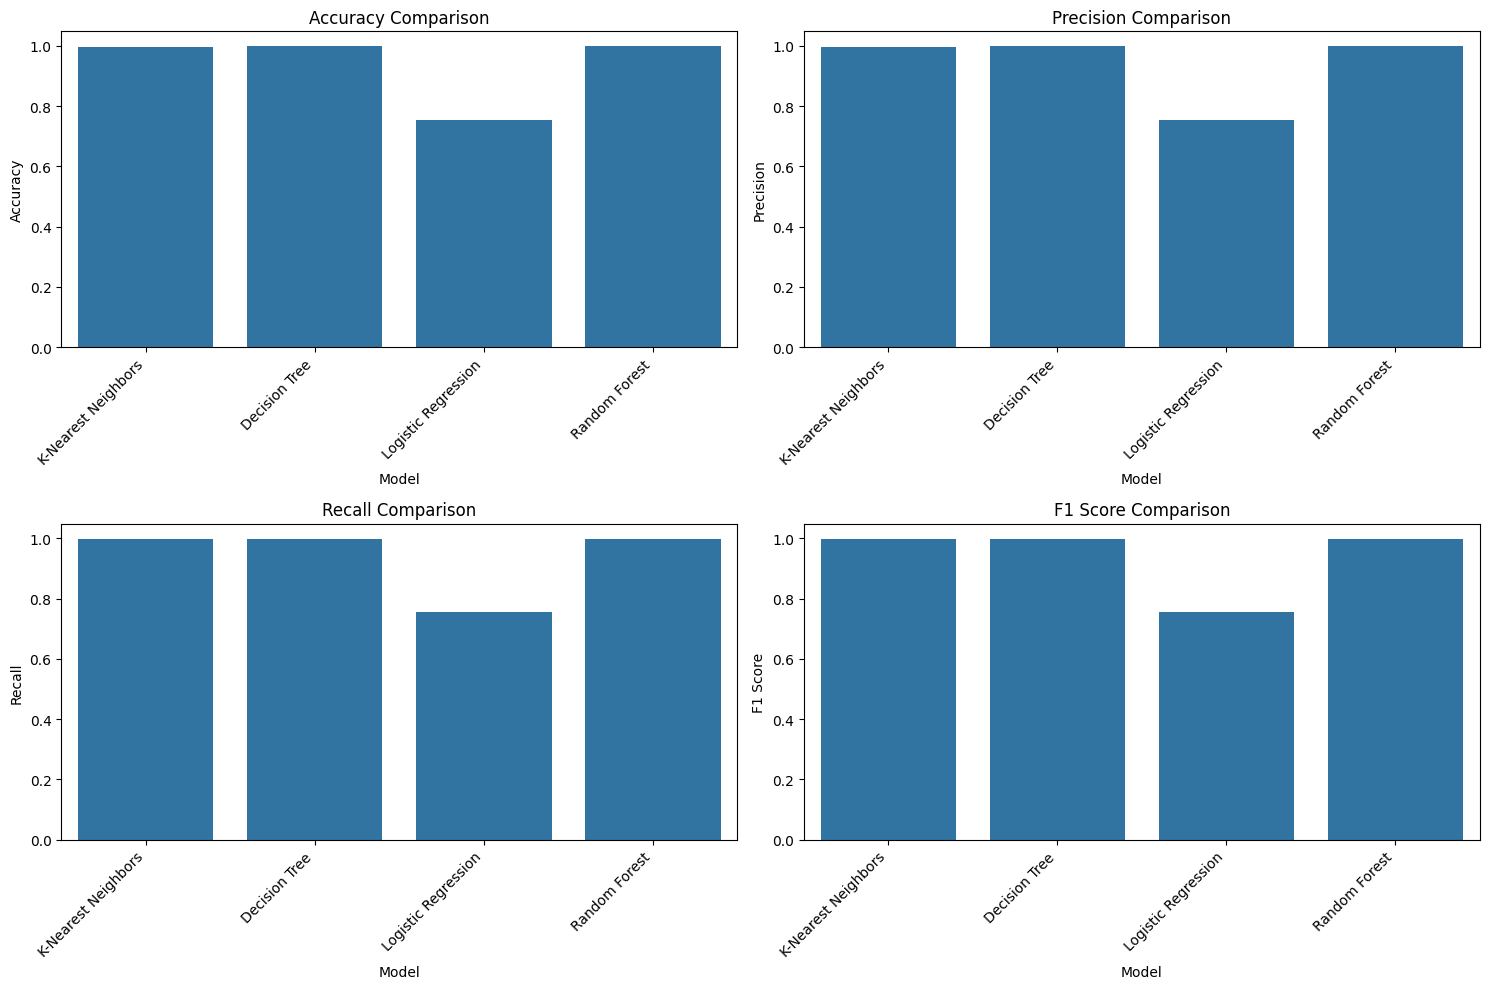


Model Performance Metrics:
              Model  Accuracy  Precision   Recall  F1 Score
K-Nearest Neighbors  0.996523   0.996528 0.996523  0.996523
      Decision Tree  0.997800   0.997800 0.997800  0.997800
Logistic Regression  0.754062   0.754067 0.754062  0.754062
      Random Forest  0.998077   0.998077 0.998077  0.998077


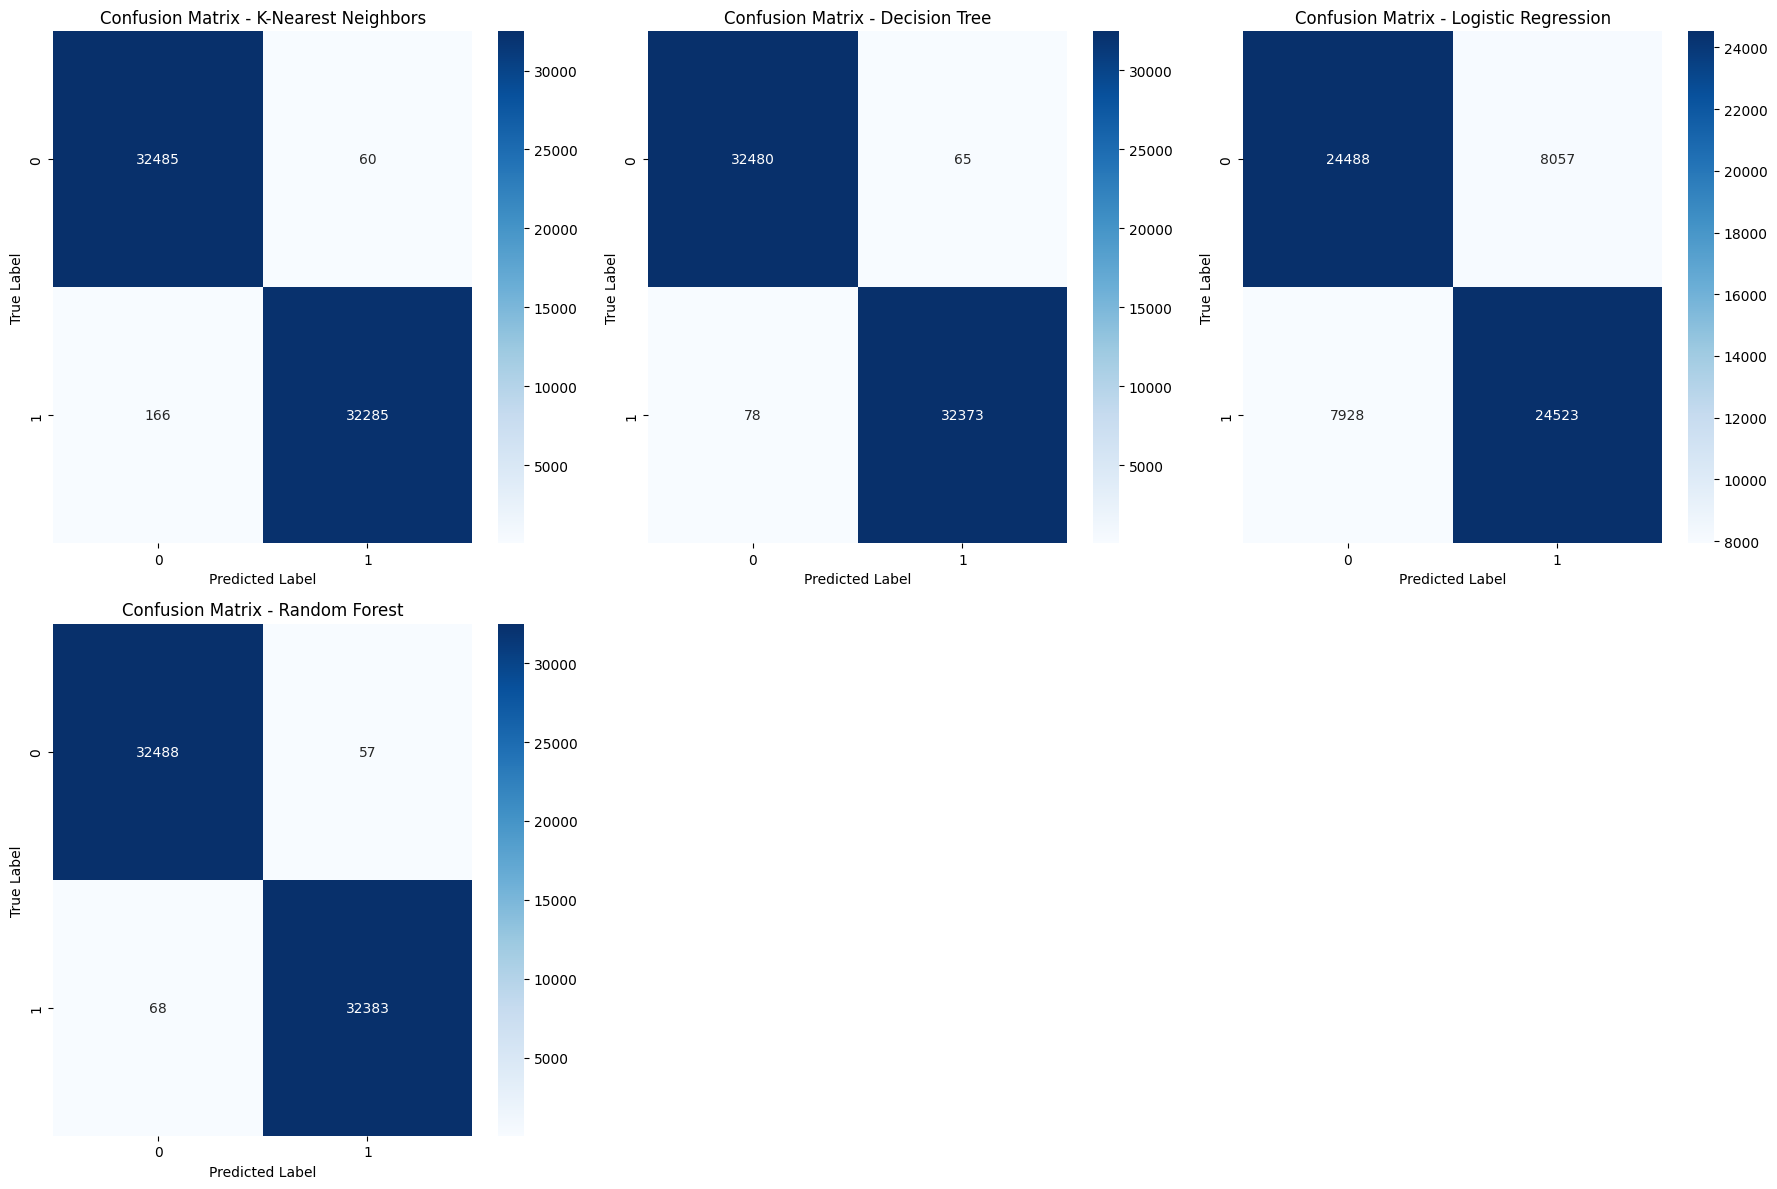

In [ ]:
plot_model_performance(performance_metrics)

plot_confusion_matrices(models, X_test, y_test)